<a href="https://colab.research.google.com/github/Nscaglio/4105/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#mount drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR4105/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Part 1:**

In [2]:
#part 1
X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = diabetes.iloc[:, [8]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("FI Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
FI Score: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

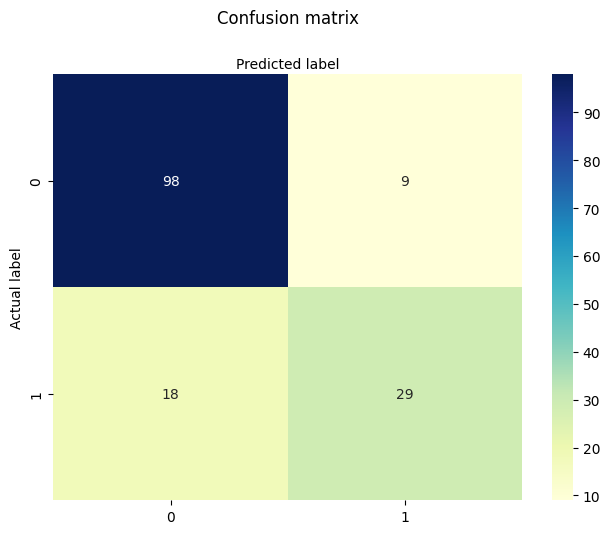

In [4]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Part 2**

In [5]:
#part 2.1
#load data set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
#split data and standardize
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train2= sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [6]:
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train2, Y_train2)
Y_pred2 = classifier2.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(Y_test2, Y_pred2))
print("Precision:",metrics.precision_score(Y_test2, Y_pred2))
print("Recall:",metrics.recall_score(Y_test2, Y_pred2))
print("FI Score:",metrics.f1_score(Y_test2, Y_pred2))

Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
FI Score: 0.981651376146789


Text(0.5, 427.9555555555555, 'Predicted label')

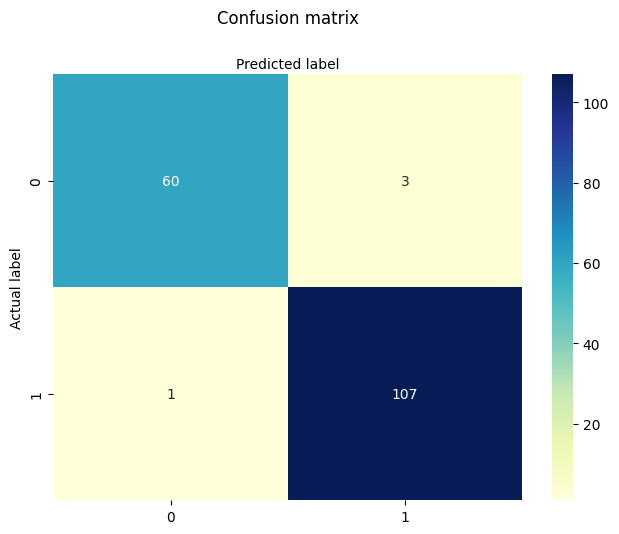

In [7]:
cnf_matrix = confusion_matrix(Y_test2, Y_pred2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**question 2 part 2**

In [8]:
#part 2.2
classifier2 = LogisticRegression(penalty='l2',random_state=0,C=0.1, solver='liblinear')
classifier2.fit(X_train2, Y_train2)
Y_pred3 = classifier2.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(Y_test2, Y_pred3))
print("Precision:",metrics.precision_score(Y_test2, Y_pred3))
print("Recall:",metrics.recall_score(Y_test2, Y_pred3))
print("FI Score:",metrics.f1_score(Y_test2, Y_pred3))

Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
FI Score: 0.9771689497716894


Text(0.5, 427.9555555555555, 'Predicted label')

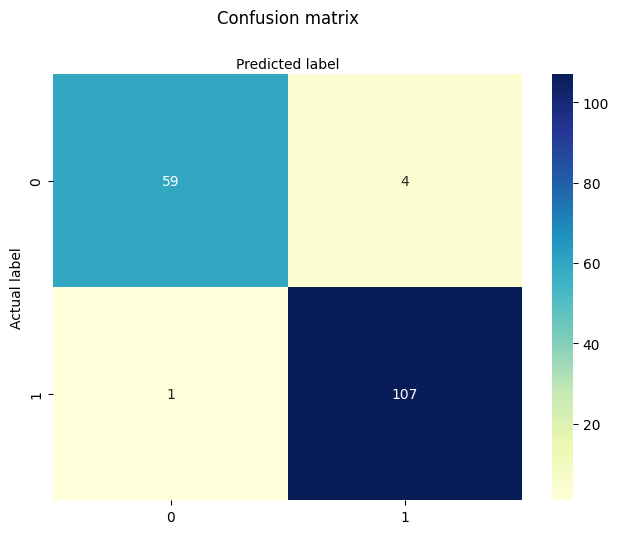

In [9]:
cnf_matrix = confusion_matrix(Y_test2, Y_pred3)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Question 3**

In [10]:
from sklearn.naive_bayes import GaussianNB as NB
classifier3 =NB()
classifier3.fit(X_train2, Y_train2)
Y_pred4 = classifier3.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(Y_test2, Y_pred4))
print("Precision:",metrics.precision_score(Y_test2, Y_pred4))
print("Recall:",metrics.recall_score(Y_test2, Y_pred4))
print("FI Score:",metrics.f1_score(Y_test2, Y_pred4))
#generally seems to be worse than logistic regression in the dataset, my guess is mostly because this is because the origional regression was so accurate


Accuracy: 0.9122807017543859
Precision: 0.9428571428571428
Recall: 0.9166666666666666
FI Score: 0.9295774647887324


Question 4

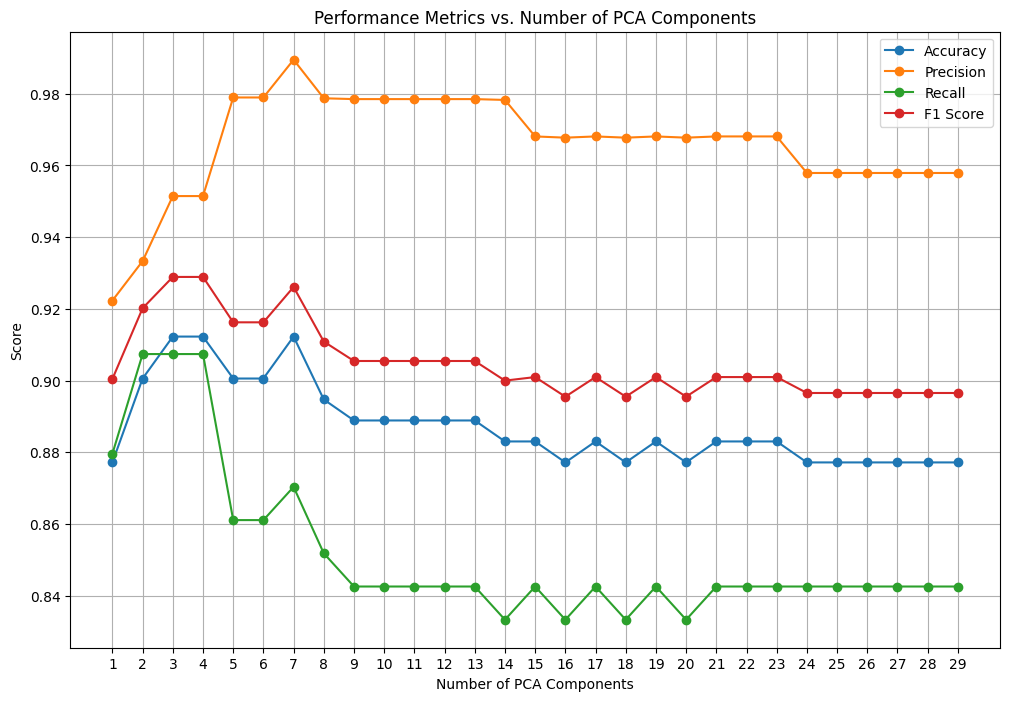

0.9122807017543859


In [23]:
#question 4
from sklearn.decomposition import PCA
accuracy_array= []
precision_array= []
recall_array= []
f1_array= []
classifier2 = LogisticRegression(random_state=0)
for N in range(1,30):
  pca = PCA(n_components=N)  # Number of components to keep
  #build the reggresion
  X_test_pca = pca.fit_transform(X_test2)
  X_train_pca = pca.fit_transform(X_train2)
  classifier2.fit(X_train_pca, Y_train2) #logistic
  Y_pred5 = classifier2.predict(X_test_pca)
  #record metrics
  accuracy_array.append(metrics.accuracy_score(Y_test2, Y_pred5))
  precision_array.append(metrics.precision_score(Y_test2, Y_pred5))
  recall_array.append(metrics.recall_score(Y_test2, Y_pred5))
  f1_array.append(metrics.f1_score(Y_test2, Y_pred5))
#plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), accuracy_array, marker='o', label='Accuracy')
plt.plot(range(1, 30), precision_array, marker='o', label='Precision')
plt.plot(range(1, 30), recall_array, marker='o', label='Recall')
plt.plot(range(1, 30), f1_array, marker='o', label='F1 Score')
plt.title('Performance Metrics vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 30))
plt.grid()
plt.legend()
plt.show()
#most accurate prinsipal components is 6
#this method is better than a basic bayes model but worse than a basic linear reggression
print(accuracy_array[6])

**Question 5**


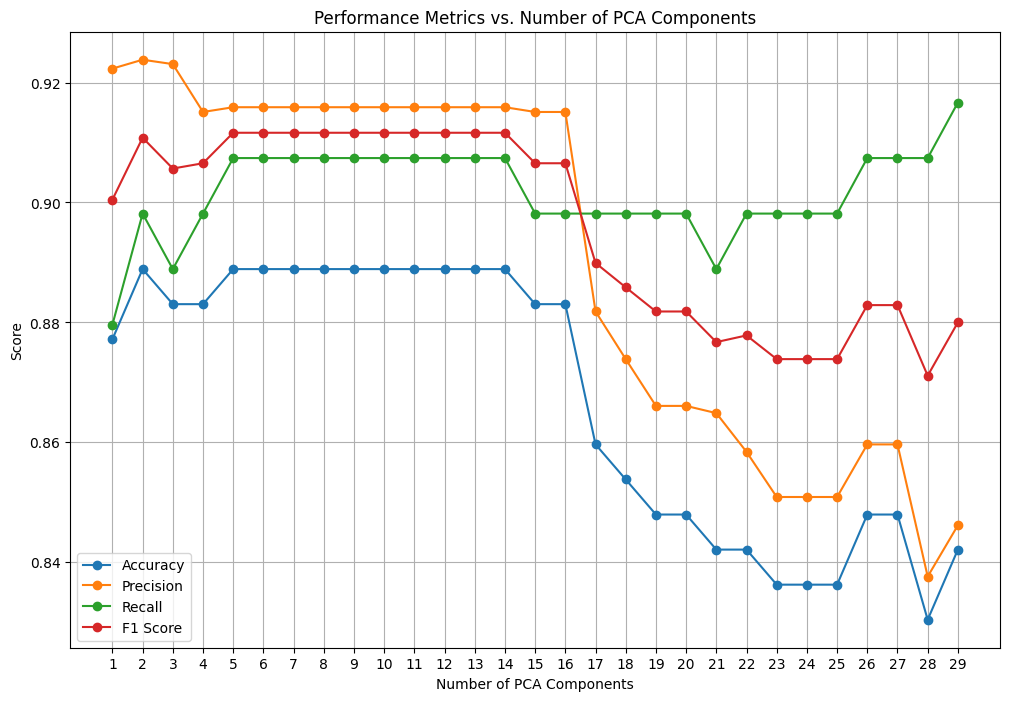

0.8947368421052632


In [22]:
accuracy_array2= []
precision_array2= []
recall_array2= []
f1_array2= []
for N in range(1,30):
  pca = PCA(n_components=N)  # Number of components to keep
  #build the reggresion
  X_test_pca = pca.fit_transform(X_test2)
  X_train_pca = pca.fit_transform(X_train2)
  classifier3.fit(X_train_pca, Y_train2) #bayes
  Y_pred6 = classifier3.predict(X_test_pca)
  #record metrics
  accuracy_array2.append(metrics.accuracy_score(Y_test2, Y_pred6))
  precision_array2.append(metrics.precision_score(Y_test2, Y_pred6))
  recall_array2.append(metrics.recall_score(Y_test2, Y_pred6))
  f1_array2.append(metrics.f1_score(Y_test2, Y_pred6))
#plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), accuracy_array2, marker='o', label='Accuracy')
plt.plot(range(1, 30), precision_array2, marker='o', label='Precision')
plt.plot(range(1, 30), recall_array2, marker='o', label='Recall')
plt.plot(range(1, 30), f1_array2, marker='o', label='F1 Score')
plt.title('Performance Metrics vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 30))
plt.grid()
plt.legend()
plt.show()
print(accuracy_array[1])
#most accurate prinsipal components is 2 for all metrics but recall
#seems to be the worst of type of for the cancer dataset